# Geração de Gráficos a partir de arquivos.txt

O objetivo deste script é gerar uma figura com um gráfico exibindo o comportamento da variável registrada em função do step size da simulação.

É importante que o script seja adaptado de acordo com a variável que será lida a partir dos arquivos, principalmente nas configurações do gráfico (legenda e título dos eixos).

In [283]:
# Importação das bibliotecas necessárias.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

In [284]:
%matplotlib inline

In [285]:
# Criação de uma lista com o nome dos arquivos txt existentes no diretório.

path = os.getcwd()
filelist = glob.glob('*.txt')                              
a = len(filelist)
files = []                                              

for i in range(0,a):
    files.append(path + '\\' + filelist[i])

In [286]:
# Leitura dos arquivos e gravação dos dados em um dataset (DataFrame do pandas).

dados = pd.DataFrame()

for IDfile in range(0,len(files)):
    arq = pd.read_table(files[IDfile])
    dados = pd.concat([dados,arq], axis=1)

# Loop para criação de um vetor que representa o step de impressão da simulação. 
# Este vetor será utilizado como índice do dataset.

tam = dados.shape
n_rows = tam[0]

step = []

for i in range(1,n_rows+1): 
    step.append(i*1000)               
    
# Algoritmo para criar um vetor coluna (biblioteca NumPy) a partir da lista step e em seguida aplica-lo como índice do dataset.

aux = np.array(step).T
indice = pd.Series(aux, name='Step')
dados = pd.concat([dados,indice], axis=1)
dados.set_index('Step', inplace=True)

##### COMANDO DESATIVADO: 
# O comando serve para renomear as colunas do dataset. Entretanto, farei a correção do nome da coluna no script do LAMMPS.

# dados.rename(columns = {'Viscosidade (Pa.s) - 4 Etapa GK':'Viscosity_GK'}, inplace = True)

In [287]:
# Algoritmo para definição automática dos limites dos eixos do gráfico.

# Eixo X:

xmax = aux[-1]

# Eixo Y:

yaxis_max = dados.max(axis=1)
ymax = yaxis_max.max()  
yaxis_min = dados.min(axis=1)
ymin = yaxis_min.min()

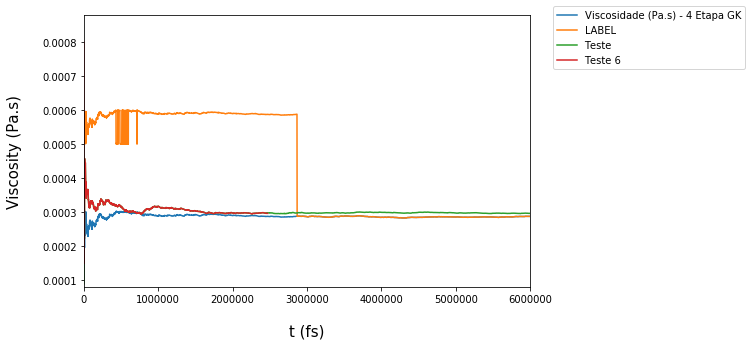

In [288]:
# CRIAÇÃO DO GRÁFICO
# O gráfico será criado a partir do dados armazenados no dataset. O primeiro comando abaixo cria o gráfico como
# um objeto, o que permite que este seja gravado em forma de arquivo (jpeg, png, pdf, etc.).

fig, axs = plt.subplots(figsize=(8,5))
dados.plot(ax=axs, xlim=(0,xmax), ylim=(0.9*ymin, 1.1*ymax))

# Configuração dos títulos dos eixos e da legenda. 

plt.xlabel('t (fs)', labelpad=20, fontsize=15)
plt.ylabel('Viscosity (Pa.s)', labelpad=20, fontsize=15)
plt.legend(loc=(1.05, 0.8))

##### COMANDO DESATIVADO: 
# Este comando pode ser utilizado caso os valores da legenda do eixo fiquem muito próximos, dificultando
# a leitura do gráfico. A proposta é escalonar os valores do eixo para que sejam exibidos apenas os pontos desejados.

# plt.xticks([-0, 1000000, 2000000], [0, 1000000, 2000000])

# Gravação de um arquivo (tipo definido pelo usuário) contendo o gráfico.

fig.savefig('grafico.png', bbox_inches='tight')